In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [2]:
ratings=pd.read_csv(r'C:\Users\Shivam\Desktop\Mckinsey\Clustering\ml-latest-small\ratings.csv')
movies=pd.read_csv(r'C:\Users\Shivam\Desktop\Mckinsey\Clustering\ml-latest-small\movies.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
data=pd.merge(ratings,movies,on='movieId')

In [6]:
pd.merge?

In [7]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
len(data['userId'].unique())

610

In [9]:
len(data['title'].unique())

9719

In [10]:
#Creating userVsMovie matrix
matrix=pd.pivot_table(data,values='rating',index='userId',columns='title')

In [11]:
matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [12]:
#Sorting the matrix to get denser result at the top
def rating_by_density(unfiltered_data):
    #For getting highest rated movies
    
    #First creating a 'row' entry that will give the count of reviews for each movie
    unfiltered_data=unfiltered_data.append(unfiltered_data.count(),ignore_index=True)
    
    #Then sorting the columns with highest rated columns in beginning
    filtered_data=unfiltered_data.sort_values(len(unfiltered_data)-1,axis=1,ascending=False).drop(len(unfiltered_data)-1)
    
    #For getting users with highest reviews
    
    #First creating a column that will give the count of reviews for each user
    filtered_data['count']=filtered_data.count(axis=1)
    
    filtered_data=filtered_data.sort_values('count',axis=0,ascending=False).drop('count', axis=1)
    
    return filtered_data
    
    

In [13]:
dense_data=rating_by_density(matrix)

In [14]:
dense_data.head()

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,King of Comedy (Hei kek ji wong) (1999),King of California (2007),"King in New York, A (1957)","King and I, The (1999)",King Solomon's Mines (1985),King Solomon's Mines (1950),King Solomon's Mines (1937),King Ralph (1991),King Kong Lives (1986),À nous la liberté (Freedom for Us) (1931)
413,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,3.5,4.0,5.0,3.0,5.0,5.0,4.0,3.5,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN
473,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
447,3.0,NaN,5.0,5.0,2.0,5.0,3.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
273,4.5,4.5,5.0,4.0,4.0,3.0,3.5,4.5,4.5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Define the plotting heatmap function
def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')
    if axis_labels:
        ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_movies_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User id')
    # Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    # Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
    plt.show()

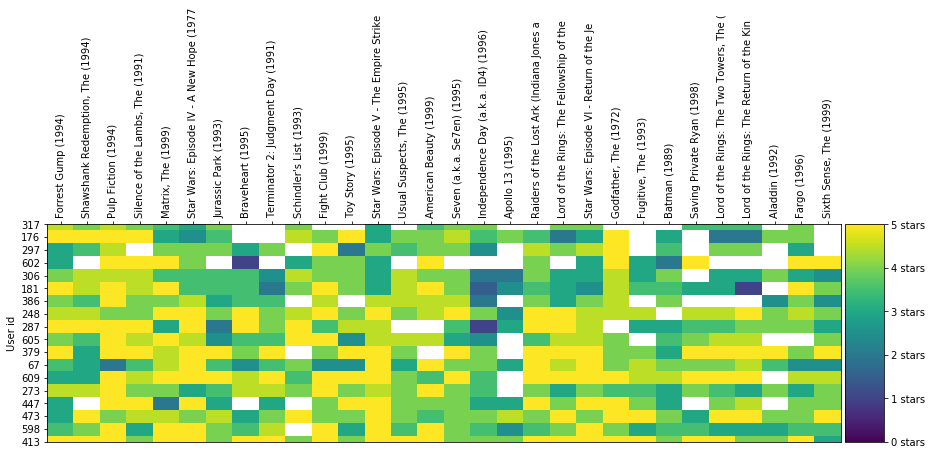

In [16]:
draw_movies_heatmap(dense_data.iloc[:18,:30])

In [17]:
most_rated_movies_1k=dense_data.iloc[:,:1000]

In [18]:
most_rated_movies_1k

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Scary Movie 2 (2001),About Schmidt (2002),21 Jump Street (2012),"Cider House Rules, The (1999)",Death Proof (2007),Moonraker (1979),"Virgin Suicides, The (1999)",¡Three Amigos! (1986),Waking Ned Devine (a.k.a. Waking Ned) (1998),Jacob's Ladder (1990)
413,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,...,2.0,4.0,NaN,4.0,3.5,3.0,4.0,3.0,NaN,3.0
598,3.5,4.0,5.0,3.0,5.0,5.0,4.0,3.5,4.5,NaN,...,1.5,1.5,2.5,3.0,3.5,NaN,2.5,2.5,2.5,4.0
473,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,...,NaN,3.5,NaN,3.0,NaN,NaN,4.0,3.0,NaN,NaN
447,3.0,NaN,5.0,5.0,2.0,5.0,3.0,NaN,3.0,NaN,...,2.0,3.5,4.5,NaN,NaN,3.0,NaN,3.0,NaN,NaN
273,4.5,4.5,5.0,4.0,4.0,3.0,3.5,4.5,4.5,4.0,...,3.0,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568,3.0,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Conversion to sparse csr matrix
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())

C:\Users\Shivam\Anaconda3new\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  
C:\Users\Shivam\Anaconda3new\lib\site-packages\pandas\core\frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)


In [20]:
predictions=KMeans(n_clusters=20).fit_predict(sparse_ratings)

In [21]:
clustered=pd.concat([most_rated_movies_1k.reset_index(),pd.DataFrame({'group':predictions})],axis=1)

In [22]:
clustered=clustered.set_index('index')

In [23]:
def draw_cluster(cluster_data,group):
    relevant_data=cluster_data[cluster_data['group']==group].drop('group',axis=1)
    draw_movies_heatmap(relevant_data.iloc[:20,:20])
    
def get_group(user,clustered):
    return clustered[clustered.index==user]['group'].values[0]

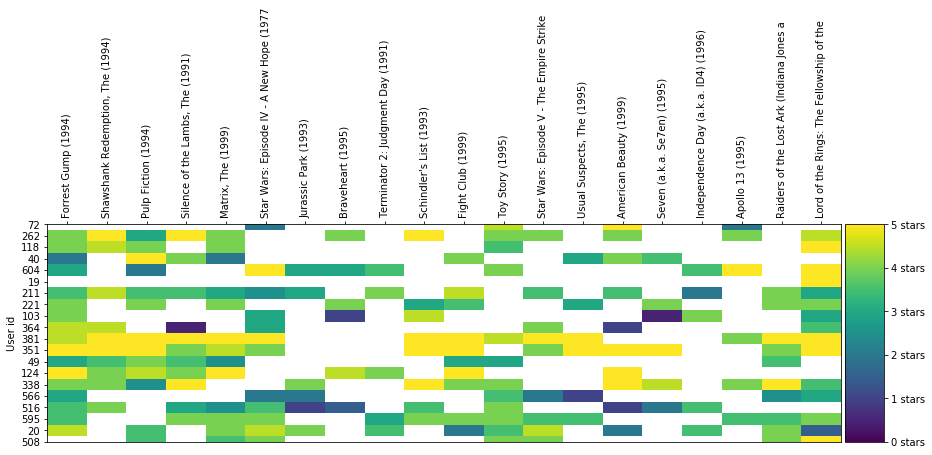

In [33]:
draw_cluster(clustered,get_group(508,clustered))

In [95]:
clustered[clustered['group']==1].mean().shape

(1001,)

In [101]:
#Defining a function to return recommendation for user
def user_recommendation(user,clustered=clustered):
    
    #Getting user's unrated movies
    user_movies=clustered.iloc[user,:]
    user_unrated_movies=user_movies[user_movies.isnull()]
    
    #Getting user's cluster
    group=clustered.iloc[user]['group']
    user_cluster=clustered[clustered['group']==group]
    
    #Movies for the user
    avg_rating=pd.concat([user_unrated_movies,user_cluster.mean()],axis=1,join='inner').loc[:,0]
    return avg_rating.sort_values(ascending=False).head(20)

In [102]:
user_recommendation(20)

Platoon (1986)                                              5.00
Mulholland Drive (2001)                                     5.00
Thin Red Line, The (1998)                                   5.00
Breakfast at Tiffany's (1961)                               5.00
Brazil (1985)                                               5.00
Star Trek: First Contact (1996)                             5.00
Casablanca (1942)                                           5.00
Cinema Paradiso (Nuovo cinema Paradiso) (1989)              5.00
Chocolat (2000)                                             5.00
Sideways (2004)                                             4.75
Heat (1995)                                                 4.75
Crash (2004)                                                4.50
Boot, Das (Boat, The) (1981)                                4.50
Singin' in the Rain (1952)                                  4.50
Fisher King, The (1991)                                     4.50
Adventures of Priscilla, 

In [94]:
clustered.iloc[518]['group']

12.0

In [74]:
user_unrated_movies=user_movies[user_movies.isnull()]

In [75]:
user_movies[user_movies.isnull()]

Forrest Gump (1994)                            NaN
Pulp Fiction (1994)                            NaN
Silence of the Lambs, The (1991)               NaN
Matrix, The (1999)                             NaN
Star Wars: Episode IV - A New Hope (1977)      NaN
                                                ..
Moonraker (1979)                               NaN
Virgin Suicides, The (1999)                    NaN
¡Three Amigos! (1986)                          NaN
Waking Ned Devine (a.k.a. Waking Ned) (1998)   NaN
Jacob's Ladder (1990)                          NaN
Name: 471, Length: 981, dtype: float64

In [79]:
avg_rating=pd.concat([user_unrated_movies, user_cluster.mean()], axis=1, join='inner').loc[:,0]

In [82]:
avg_rating.sort_values(ascending=False).head(20)

Road Warrior, The (Mad Max 2) (1981)                               5.000000
City of Lost Children, The (Cité des enfants perdus, La) (1995)    5.000000
Gods Must Be Crazy, The (1980)                                     5.000000
Cool Hand Luke (1967)                                              5.000000
Hudsucker Proxy, The (1994)                                        4.833333
The Count of Monte Cristo (2002)                                   4.800000
Patton (1970)                                                      4.750000
Caddyshack (1980)                                                  4.666667
Army of Darkness (1993)                                            4.666667
There Will Be Blood (2007)                                         4.642857
Wallace & Gromit: The Best of Aardman Animation (1996)             4.600000
Star Trek: First Contact (1996)                                    4.583333
Sleeper (1973)                                                     4.500000
Boot, Das (B